4


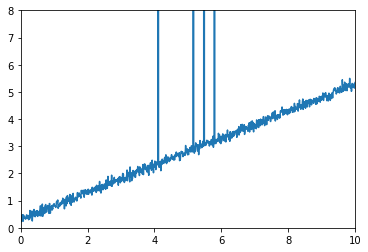

In [22]:
#Ransac
import numpy as np
import matplotlib.pyplot as plt

# true values
_a = 0.5
_b = 0.3

# samples
points = np.array([[x, _a * x + _b + .1 * np.random.randn() + (np.random.randint(100) == 0) * np.random.rand() * 1000]
                    for x in np.arange(0, 10, 0.01)])

print(sum(points[:,1]>10))

plt.plot(points[:,0], points[:,1])
plt.xlim([0,10])
plt.ylim([0,8])
plt.show()


In [50]:
#線形回帰クラス
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        
        self.eta=eta
        self.n_iter=n_iter
    
    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        self.wlist_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            
            self.cost_.append(cost)
            self.wlist_.append(w_)
        
        return self
    
    def net_input(self, X):
        
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        
        return self.net_input(X)
    


In [ ]:
# def ransac(estimator, X, y, k, t, d):
#     """
#     k:試行回数の上限値
#     t:仮モデルの当てはめの外れ値判定の値域
#     d:仮モデルの当てはめの外れ値の許容率
#     """
    
#     good_models = []
#     good_model_errors = []
#     iterations = 0
    
#     while iterations < k:
        
#         n = np.ranom.choice(len(X), 2, False)
#         X_sampling, y_sampling = X[n], y[n]
#         estimator.fit(X_sampling, y_sampling)
       
#         params = []
#         for i in range(k+1):
#             params.append(estimator.w_[k])
        
#         cnt = 0
#         for x in X:
#             if x.dot.params>

In [51]:
#回帰プロット関数
def lin_regplot(X, y, model):
    
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    
    return

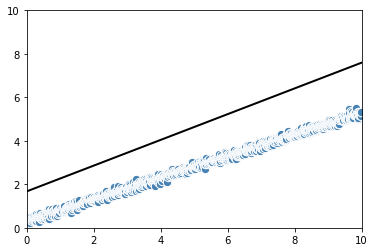

In [55]:
from sklearn.linear_model import LinearRegression

# lr = LinearRegressionGD()
# lr.fit(X, y)

# plt.plot(range(1, lr.n_iter+1), lr.cost_)
# plt.xlabel('Epoch')
# plt.ylabel('SSE')
# plt.show()

slr = LinearRegression()

X = points[:,0]
X = X[:, np.newaxis]
y = points[:,1]

slr.fit(X, y)

lin_regplot(X, y, slr)
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()



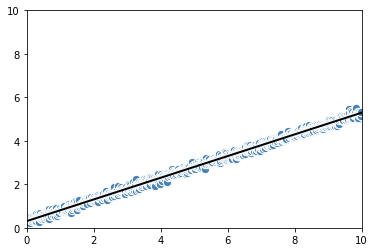

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

X = points[:,0]
X = X[:, np.newaxis]
y = points[:,1]

ransac = RANSACRegressor(LinearRegression(), max_trials=10, min_samples=2, loss='absolute_loss', residual_threshold=10, random_state=0)
ransac.fit(X,y)


lin_regplot(X, y, ransac)
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()

